In [ ]:
pip install csaps

In [ ]:
import pandas as pd
import numpy as np
from csaps import csaps
from matplotlib import pyplot as plt

ModuleNotFoundError: No module named 'csaps'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from google.colab import files

Mounted at /content/drive


In [ ]:
import os

In [ ]:
def df_constructor(filename, ind):
  df = pd.read_csv(f"/content/drive/MyDrive/ResearchProject/datafiles/{ind}/combined/ext_activity/{filename}")
  df['datetime'] = pd.to_datetime(df['datetime'])
  df['minute'] = (df['datetime'] - df['datetime'].min()).dt.total_seconds() / 60
  df['minute'] = df['minute'].astype(int)
  for i in range(len(df['minute'])):
    variation = np.random.uniform(low=-0.1, high=0.1)
    df['minute'].iloc[i] += variation

  df.rename(columns={'Glucose Value (mg/dL)' : 'glucose'}, inplace=True)
  df['delta_glucose'] = df['glucose'] - df['glucose'].iloc[0]

  return df

In [ ]:
individuals = []
for i in range(1, 17):
  if i < 10:
    individuals.append(f'00{i}')
  else:
    individuals.append(f'0{i}')

In [ ]:
all_dfs = []

for i in range(len(individuals)):
  ind = individuals[i]
  folderPath = f'/content/drive/MyDrive/ResearchProject/datafiles/{ind}/combined/ext_activity'
  file_list = os.listdir(folderPath)
  all_dfs.append([[], [], [], []])

  for filename in file_list:
    df = df_constructor(filename, ind)
    if df['glucose'].isnull().values.any():
      continue
    if df[' hr'].isnull().values.any():
      continue
    if df['absDistance'].isnull().values.any():
      continue
    if df['a'][0] == 20:
      all_dfs[i][0].append(df)
    elif df['a'][0] == 40:
      all_dfs[i][1].append(df)
    elif df['a'][0] == 60:
      all_dfs[i][2].append(df)
    elif df['a'][0] == 80:
      all_dfs[i][3].append(df)

<ipython-input-10-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-10-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-10-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-10-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a c

In [ ]:
def GAM_model(df):
  fitted_spline = csaps(df['minute'], df['delta_glucose'], smooth = 0.001)
  return fitted_spline

In [ ]:
from google.colab import files

In [ ]:
all_dfs[1][1]

[]

In [ ]:
for i in range(16):
  for j in range(len(all_dfs[i])):
    for k in range(len(all_dfs[i][j])):
      df = all_dfs[i][j][k]
      model = GAM_model(df)
      X = np.linspace(df['minute'].min(), df['minute'].max(), 60)
      Y = model(X)
      plt.scatter(df['minute'], df['delta_glucose'])
      plt.plot(X, Y)
      plt.title(f'Individual {i + 1}_{20*(j + 1)}min_{k}')
      plt.show()
      plt.savefig(f'0{i + 1}_{20*(j + 1)}_{k}.png')
      files.download(f'0{i + 1}_{20*(j + 1)}_{k}.png')
      plt.clf()

Now for each individual, we want to aggregrate bouts of the same duration

In [ ]:
act20 = [[] for i in range(16)]
act40 = [[] for i in range(16)]
act60 = [[] for i in range(16)]
act80 = [[] for i in range(16)]
for i in range(len(individuals)):
  ind = individuals[i]
  folderPath = f'/content/drive/MyDrive/ResearchProject/datafiles/{ind}/combined/ext_activity'
  file_list = os.listdir(folderPath)

  for filename in file_list:
    df = df_constructor(filename, ind)
    if df['glucose'].isnull().values.any():
      continue
    if df[' hr'].isnull().values.any():
      continue
    if df['absDistance'].isnull().values.any():
      continue
    if df['a'][0] == 20:
      act20[i].append(df)
    if df['a'][0] == 40:
      act40[i].append(df)
    if df['a'][0] == 60:
      act60[i].append(df)
    if df['a'][0] == 80:
      act80[i].append(df)

<ipython-input-6-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-6-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-6-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'].iloc[i] += variation
<ipython-input-6-fad3426943fd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy 

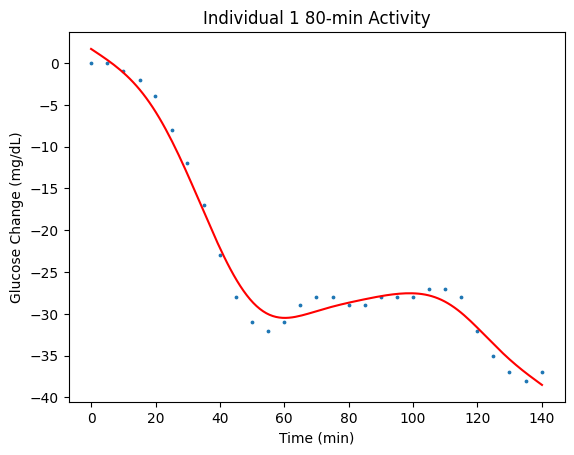

In [ ]:
for i in range(1):
  if len(act60[i]) == 0:
    continue
  df = pd.concat(act80[i])
  df.reset_index(drop=True, inplace=True)
  df.sort_values(by=['minute'], inplace=True)
  model = GAM_model(df)
  X = np.linspace(df['minute'].min(), df['minute'].max(), 140)
  Y = model(X)
  plt.scatter(df['minute'], df['delta_glucose'], s = 3)
  plt.plot(X, Y, c = 'red')
  plt.xlabel('Time (min)')
  plt.ylabel('Glucose Change (mg/dL)')
  plt.title(f'Individual {i + 1} 80-min Activity')
  #plt.savefig(f'aggregated_0{i + 1}_20min.png')
  #files.download(f'aggregated_0{i + 1}_20min.png')
  plt.show()
  plt.close()